# 딥러닝의 통계적 이해 - 1,2장 

<p style='text-align: right;'> 2021.09.03. </p>
<p style='text-align: right;'> 발표자 최경호 </p>

[colab에서 열기](https://colab.research.google.com/github/attagungho/knou/blob/main/SUD/0904_ch1_2.ipynb)
<br>
---
<a id="index"></a>
+ 목차
  + [ch1. 딥러닝의 개요](#ch1)
    + 머신러닝
    + 신경망
  + [ch2. 딥러닝과 통계학](#ch2)
    + 통계학과 딥러닝
    + 퍼셉트론과 아달린
    + 선형 회귀모형
    + 최적화방법
    + 로지스틱 회귀와 소프트맥스 회귀
    + XOR 문제와 다층신경망

<a id="ch1"></a>
## ch1. 딥러닝의 개요

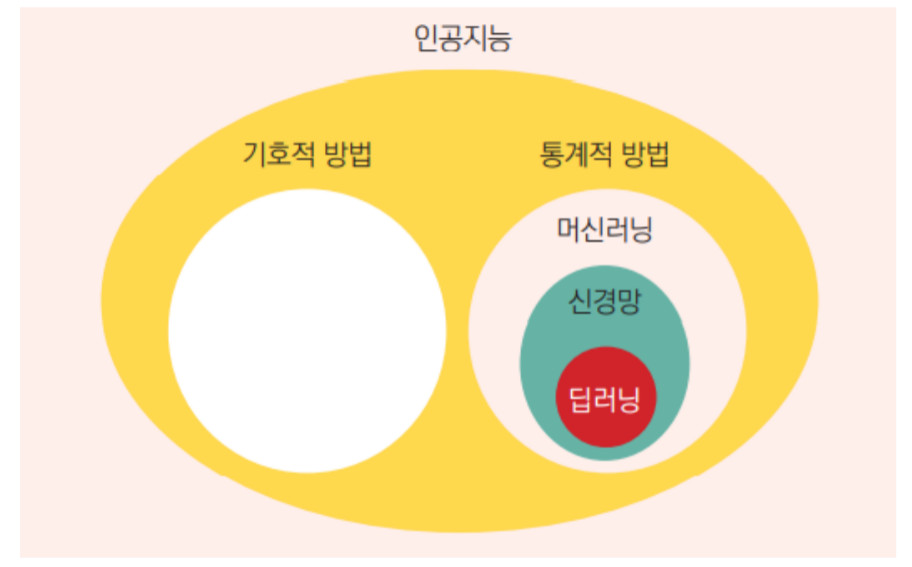

In [1]:
from IPython.display import Image
Image(filename='./data/0904_01.jpg', width=500)

<p style='text-align: center;'>출처 : '딥러닝의 통계적 이해', 6p, 한국방송통신대학교출판문화원<p>

### 머신러닝
+ 기호적 방법 : 프로그래밍
+ 통계적 방법 : 머신러닝 - 신경망 - 딥러닝   

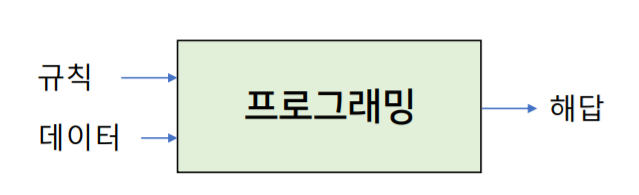

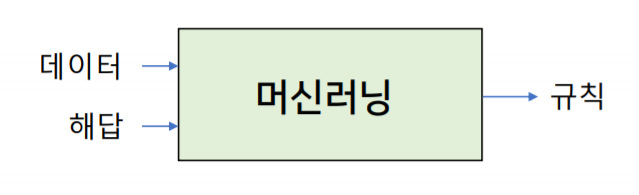

In [2]:
a = Image(filename='./data/0904_02_01.png')
b = Image(filename='./data/0904_02_02.png')
display(a,b)

<p style='text-align: center;'>출처 : '딥러닝의 통계적 이해 강의록', 11p,12p<p>

+ 머신러닝은 명시적으로 프로그래밍 되지 않는다.
+ 제공 받은 데이터에서 통계적 구조를 찾아 그 작업을 자동화하기 위한 규칙을 만들어 낸다.   
<br>
   
|머신러닝의 구성| |
|:-:|:-|
|과제|분류, 예측|
|데이터| 입력데이터, 기대출력데이터|
|모형|확률모형(회귀, 나이브베이지안), 알고리즘모형(SVM, 나무모형, 신경망)|
|손실함수|모형이 학습을 하기 위한 지표(교차 엔트로피(cross entropy), 평균제곱오차(mse)|
|최적화 알고리즘|손실함수를 최소화 하는 모수(parameter)를 찾아가는 방법|

<br>

|머신러닝의 학습방법| |
|:-:|:-|
|지도학습|정답(라벨)이 있는 입력 데이터 : 회귀, 분류|
|비지도학습|정답(라벨)이 없는 입력 데이터 : 군집|
|강화학습|순차적인 의사결정 문제에서 누적 보상을 최대화 하기 위해 시행착오를 통해 행동을 교정하는 학습(게임, 운전, 주식)|

<br>

### 신경망

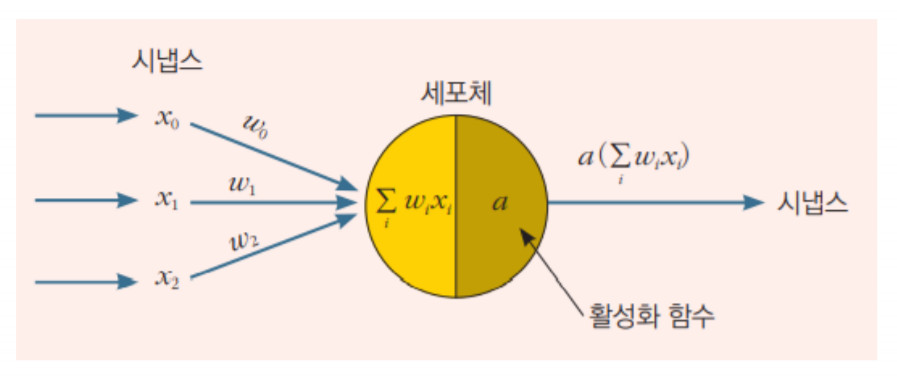

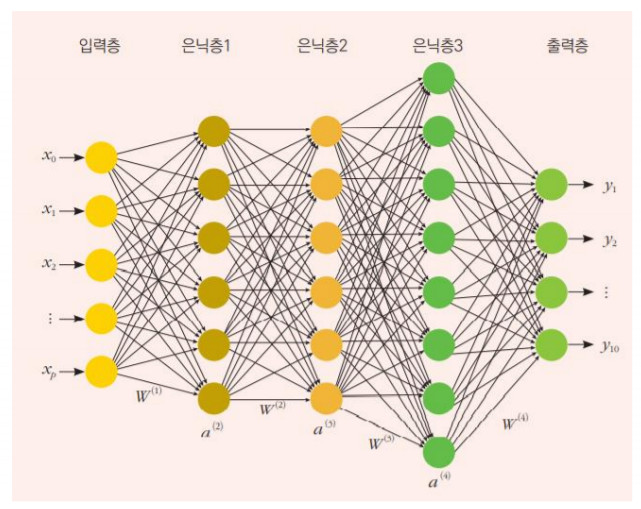

In [3]:
a = Image('./data/0904_03_01.jpg', width=400)
b = Image('./data/0904_03_02.jpg', width= 500)
display(a,b)

<p style='text-align: center;'>출처 : '딥러닝의 통계적 이해 강의록', 20, 21p<p>
    
<br>

|신경망의 종류| |
|:-:|:-|
|Convolutional Neural Networks|5장|
|Recurrent Neural Networsk|8장|
|Auto Encoder, Genarative Adversarial Networks|9장|
|attention, Transformer|9장|
|$\vdots$||

+ 딥러닝 : 데이터의 표현을 점점 더 의미있게 만들어가도록 연속적이고 계층적인 네트워크로 학습할 수 있도록 설계된 신경망   

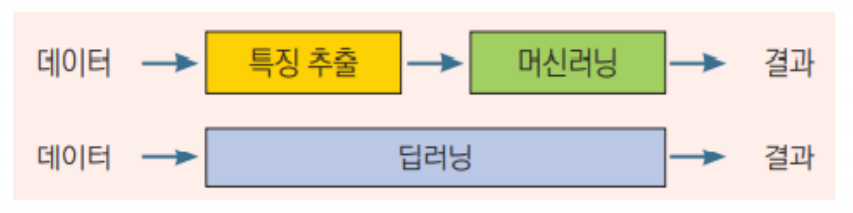

In [4]:
Image('./data/0904_04.png', width=500)

|딥러닝 발전의 배경| |
|:-:|:-|
|하드웨어|CPU, GPU(CUDA interface), TPU|
|데이터|이미지넷 데이터셋 구축, 벤치마크 데이터 셋 구축|
|알고리즘|활성함수, 가중치 초기화, 경사하강방법 optimizer|

<br>

---
<a id="ch2"></a>
<br>
## ch2. 딥러닝과 통계학
<br>

### 통계학과 딥러닝

|통계학|머신러닝/딥러닝 |
|:-|:-|
|수리적 추론 중심|알고리즘 추론 중심|
|모수(parameter)|가중치(weight)|
|추정(estimate), 적합(fit)|학습(learn)|
|독립변수, 설명변수 | 특징(feature) |
|종속변수, 반응변수 | 레이블(label) |
|적합도, 유의성으로 평가| 예측력으로 평가|
|생성구조를 오차에서 분리| 데이터의 특성을 학습|

**확률과 정보량**

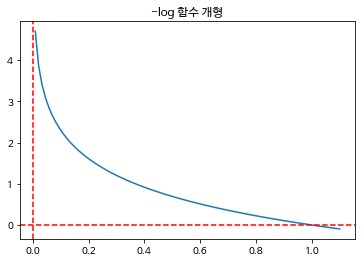

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'NanumBarunGothic'

X = np.linspace(-0.1, 1.1, 100)
Y = -np.log(X)
plt.plot(X, Y)
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x=0, color='r', linestyle='--')
plt.title('-log 함수 개형')
plt.show()

  + 확률 : 사건이 일어날 가능성을 0과 1 사이의 숫자로 표현하는 것.
  + 정보량 : $-log(사건이\ 일어날\ 확률) = -log[P(x)]$
   
+ 확률변수의 기댓값과 정보량의 기댓값
  + 확률변수의 기댓값 : 
  $$E(X) = \sum_i x_i f(x_i)$$
  + 정보량의 기댓값(엔트로피) : 
  $$H(X) = \sum_i -log[f(x_i)]f(x_i) $$
   
**베르누이 분포**
  + 한번의 실험을 시행할 때 결과가 둘 중의 하나가 되는 확률변수가 따르는 확률분포
  + 베르누이 분포의 확률질량함수 : 
  $$f(x) = p^x(1-p)^{1-x}, x=0,1$$
  + 베르누이 분포를 따르는 확률변수 X의 엔트로피
  $$\begin{align}
  H(X) &= \sum_{i=1}^2 -log[f(x_i)]f(x_i) \\
  &= -log[f(x_1)]f(x_1) + (-log[f(x_2)]f(x_2)) \\
  &= -log[f(0)]f(0) -log[f(1)]f(1) \\
  &= -log[p^0(1-p)^{1-0}]p^0(1-p)^{1-0} -log[p^1(1-p)^{1-1}]p^1(1-p)^{1-1} \\
  &= -log[1\cdot(1-p)^{1}]1\cdot(1-p)^{1} -log[p^1\cdot 1]p^1\cdot 1 \\
  &= -log(1-p)\cdot(1-p) -logp \cdot p \\
  &= -[plogp + (1-p)log(1-p)]
  \end{align}
  $$

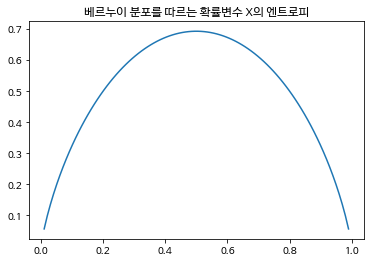

In [6]:
X = np.linspace(0, 1, 100)
Y = -(X*np.log(X)+(1-X)*np.log(1-X))
plt.plot(X, Y)
plt.title('베르누이 분포를 따르는 확률변수 X의 엔트로피')
plt.show()

+ 곱셈함수의 미분 $\frac{d f(x)\cdot g(x)}{dx} = f'(x)\cdot g(x) + f(x)\cdot g'(x)$
+ 결합함수의 미분 $u = f(x), y = g(u), \quad \frac{dy}{dx} = \frac{dy}{du} \cdot \frac{du}{dx}$
+ 로그함수의 미분 $\frac{d \log x}{d x} = \frac{1}{x} $
+ 베르누이 분포를 따르는 확률변수X의 엔트로피를 미분하여 최대값이 되는 p= 0.5
   
<br>


In [7]:
-0.5 * np.log2(0.5) - 0.5 * np.log2(0.5)

1.0

In [8]:
-0.5 * np.log(0.5) - 0.5 * np.log(0.5)

0.6931471805599453

**멀티누이 분포**
+ 한번의 실험을 시행할 때 결과가 k개의 범주 중 하나가 되는 확률변수가 따르는 분포
+ 베르누이 분포를 여러번 시행 시 이항분포를 따르듯 멀티누이 분포를 여러번 시행 시 다항분포를 따른다.
+ 베르누이 분포를 따르는 확률변수 X의 엔트로피
$$H(X) = - \sum_i^k P(x_i)logP(x_i) $$
<br> 

**정규분포**
+ 연속형 변수의 예측 과제에 활용
+ 정규분포를 따르는 확률변수 X의 엔트로피
$$ 
\begin{align}
H(X) &= -E[-\frac{1}{2} \log(2 \pi \sigma^2) - \frac{(x-\mu)^2}{2\sigma^2}] \\
&= \frac{1}{2} \log(2 \pi \sigma^2) -E[- \frac{(x-\mu)^2}{2\sigma^2}] \\
&= \frac{1}{2} \log(2 \pi \sigma^2) -E[- \frac{1}{2\sigma^2}\cdot (x-\mu)^2] \\
&= \frac{1}{2} \log(2 \pi \sigma^2) + \frac{1}{2\sigma^2}\cdot E[(x-\mu)^2] \\
&= \frac{1}{2} \log(2 \pi \sigma^2) + \frac{1}{2\sigma^2}\cdot Var(X)\\
&= \frac{1}{2} \log(2 \pi \sigma^2) + \frac{1}{2\sigma^2}\cdot \sigma^2\\
&= \frac{1}{2} \log(2 \pi \sigma^2) + \frac{1}{2}\\
\end{align}
$$

### 퍼셉트론과 아달린

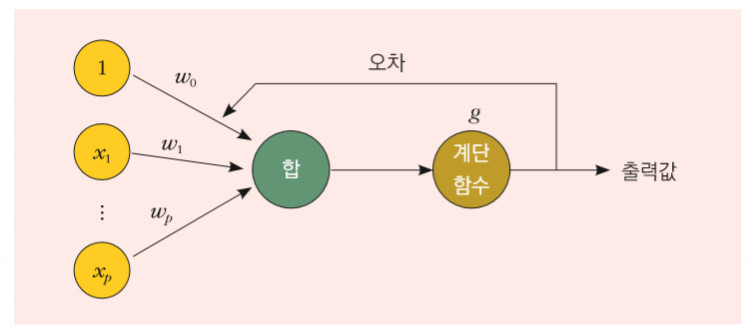

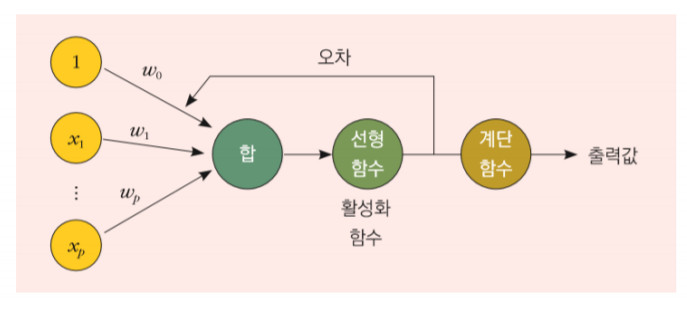

In [9]:
a = Image('./data/0904_05_01.jpg', width=600)
b = Image('./data/0904_05_02.jpg', width=600)
display(a,b)

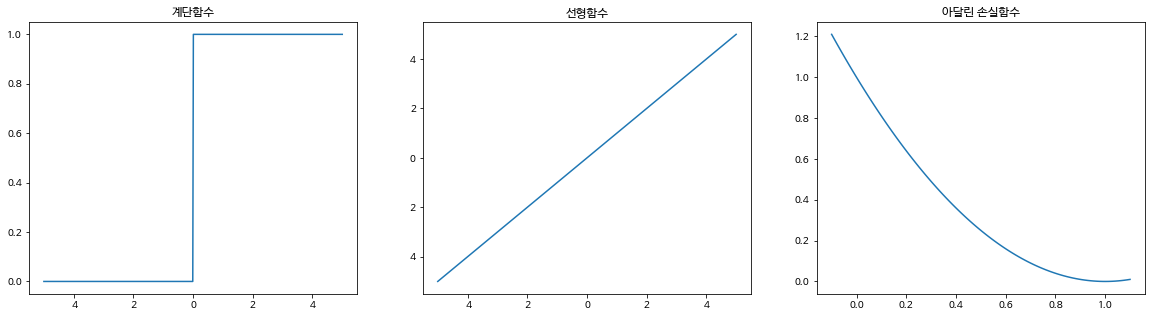

In [10]:
def step_function(x):
    return np.array(x > 0)

def linear_function(x):
    return x

def loss_function(x):
    return (1-x)**2

plt.figure(figsize=(20,5))
X = np.linspace(-5.0, 5.0, 500)
Y = step_function(X)
plt.subplot(1, 3, 1) 
plt.plot(X, Y)
plt.title('계단함수')

X = np.linspace(-5.0, 5.0, 100)
Y = linear_function(X)
plt.subplot(1, 3, 2) 
plt.plot(X, Y) 
plt.title('선형함수')

X = np.linspace(-0.1, 1.1, 100)
Y = loss_function(X)
plt.subplot(1, 3, 3) 
plt.plot(X, Y)
plt.title('아달린 손실함수')
plt.show()

+ 퍼셉트론과 아달린의 가중치 갱신 계산식은 동일하다.
  + 아달린의 가중치 갱신 계산식은 loss 함수의 미분을 통해 도출할 수 있으나, 퍼셉트론의 가중치 갱신 계산식은 정의된 것이다.
  + 아달린의 error는 연속적이나 퍼셉트론의 error는 연속적이지 않다.

#### 예제 2.2, 2.4

**퍼셉트론**

In [11]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df=(df-df.mean())/df.std()
df['target'] = iris.target
df.drop(['petal length (cm)','petal width (cm)'], axis= 1, inplace=True)
virginica_idx = df[df['target'] == 2].index
df.drop(virginica_idx, axis=0, inplace=True)
df.head()

,sepal length (cm),sepal width (cm),target
0,-0.897674,1.015602,0
1,-1.139200,-0.131539,0
2,-1.380727,0.327318,0
3,-1.501490,0.097889,0
4,-1.018437,1.245030,0


In [12]:
df_shuffled=df.sample(frac=1).reset_index(drop=True)

In [13]:
lr = 1e-2
steps = 800
data_len = len(df)
a=0
b=0
c=0
error_sum = 0
error_tape = []

for i in range(steps): # epoch 수 만큼 반복
    j = i % data_len
    y_hat = step_function(a * df_shuffled.iloc[j,0] + b * df_shuffled.iloc[j,1] + c)  # 퍼셉트론으로 y를 구하는 식을 세웁니다
    error = df_shuffled.iloc[j,2] - y_hat  #오차를 구하는 식입니다.
    error_sum += abs(error)

    a_diff = lr * error * df_shuffled.iloc[j,0]  # dw1
    b_diff = lr * error * df_shuffled.iloc[j,1]  # dw2 
    c_diff = lr * error # dw0
    a = a + a_diff  # 가중치 갱신
    b = b + b_diff  # 가중치 갱신
    c = c + c_diff  # 가중치 갱신
    if i % data_len == 99:
        error_tape.append(error_sum)
        error_sum = 0
        print("epoch={:d}, w1={:.4f}, w2={:.4f}, 절편={:.4f}".format(i//data_len +1, a, b, c))

epoch=1, w1=0.0176, w2=-0.0105, 절편=0.0100
epoch=2, w1=0.0176, w2=-0.0105, 절편=0.0100
epoch=3, w1=0.0176, w2=-0.0105, 절편=0.0100
epoch=4, w1=0.0176, w2=-0.0105, 절편=0.0100
epoch=5, w1=0.0176, w2=-0.0105, 절편=0.0100
epoch=6, w1=0.0176, w2=-0.0105, 절편=0.0100
epoch=7, w1=0.0176, w2=-0.0105, 절편=0.0100
epoch=8, w1=0.0176, w2=-0.0105, 절편=0.0100


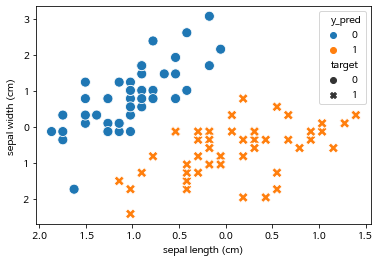

In [14]:
import seaborn as sns
y_pred = step_function(a * df['sepal length (cm)'] + b * df['sepal width (cm)'] + c)
y_pred = [np.int(pred) for pred in y_pred]
df['y_pred'] = y_pred
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='y_pred', style='target', s=100, data=df)
plt.show()

**아달린**

In [15]:
lr = 1e-2
steps = 800
data_len = len(df)
a=0
b=0
c=0
temp_tape = []
loss_tape = []

for i in range(steps): # epoch 수 만큼 반복
    j = i % data_len
    y_hat = a * df_shuffled.iloc[j,0] + b * df_shuffled.iloc[j,1] + c  # 퍼셉트론으로 y를 구하는 식을 세웁니다
    error = df_shuffled.iloc[j,2] - y_hat  #오차를 구하는 식입니다.
    temp_tape.append(error)

    a_diff = lr * error * df_shuffled.iloc[j,0]  # dw1
    b_diff = lr * error * df_shuffled.iloc[j,1]  # dw2 
    c_diff = lr * error # dw0
    a = a + a_diff  # 가중치 갱신
    b = b + b_diff  # 가중치 갱신
    c = c + c_diff  # 가중치 갱신
    if i % data_len == 99:
        loss_tape.append(sum(np.array(temp_tape)**2))
        temp_tape = []
        print("epoch={:d}, w1={:.4f}, w2={:.4f}, 절편={:.4f}".format(i//data_len +1, a, b, c))

epoch=1, w1=0.0797, w2=-0.2081, 절편=0.3473
epoch=2, w1=0.1708, w2=-0.2713, 절편=0.5047
epoch=3, w1=0.2419, w2=-0.2866, 절편=0.5859
epoch=4, w1=0.2918, w2=-0.2875, 절편=0.6319
epoch=5, w1=0.3255, w2=-0.2850, 절편=0.6598
epoch=6, w1=0.3479, w2=-0.2822, 절편=0.6772
epoch=7, w1=0.3626, w2=-0.2801, 절편=0.6883
epoch=8, w1=0.3722, w2=-0.2786, 절편=0.6955


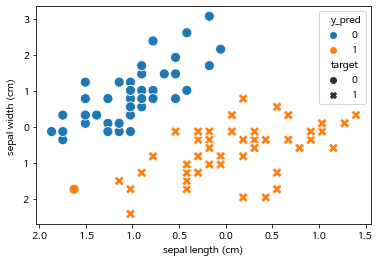

In [16]:
y_pred = a * df['sepal length (cm)'] + b * df['sepal width (cm)'] + c
y_pred = [1 if pred>0.5 else 0 for pred in y_pred]
df['y_pred'] = y_pred
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='y_pred', style='target', s=100, data=df)
plt.show()

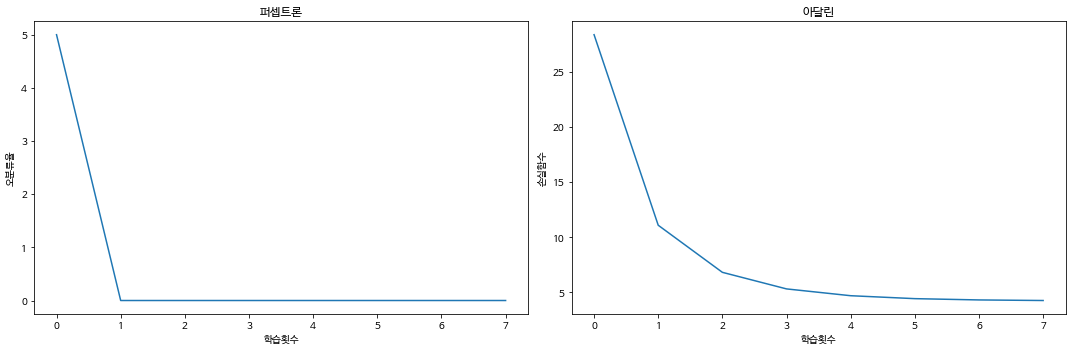

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)                
plt.plot(error_tape)
plt.title('퍼셉트론')
plt.xlabel('학습횟수')
plt.ylabel('오분류율')

plt.subplot(1, 2, 2)                
plt.plot(loss_tape)
plt.title('아달린')
plt.xlabel('학습횟수')
plt.ylabel('손실함수')

plt.tight_layout()
plt.show()

### 선형 회귀모형

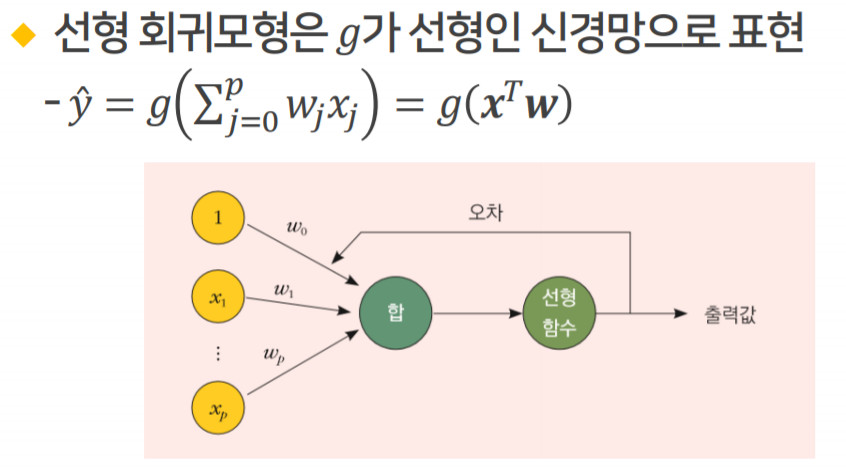

In [18]:
Image('./data/0904_06.jpg', width=600)

+ 최소제곱법
  + 손실함수를 회귀직선과 데이터 간 평균제곱오차로 정하고 이를 최소화 하는 $\boldsymbol{w}$를 구하는 것이다.
  + 행렬과 벡터로 표현한 손실 함수의 정리 $\boldsymbol{y : n\times 1, X : n \times (m+1), w : (m+1)\times 1}$   
  
<br>     

  $$
  \begin{align}
  J(\boldsymbol{w}) &= (\boldsymbol{Xw -y})^2 , \\ 
  &= \boldsymbol{(Xw-y)^T(Xw-y)} \\
  &= \boldsymbol{(w^TX^T-y^T)(Xw-y)} \\
  &= \boldsymbol{w^TX^TXw - y^TXw - w^TX^Ty + y^Ty} \\
  &= \boldsymbol{w^TX^TXw - 2 w^TX^Ty + y^Ty} \\
  \end{align}
  $$
   
   
  $$
  \begin{align}
  \frac{\partial J(\boldsymbol{w})}{\partial \boldsymbol{w}} &= \boldsymbol{-2X^Ty + 2X^TXw} = 0  \\
  \boldsymbol{2X^Ty} &= \boldsymbol{2X^TXw} \\ 
  \boldsymbol{X^Ty} &= \boldsymbol{X^TXw} \\
  \boldsymbol{(X^TX)^{-1}X^Ty} &= \boldsymbol{w} 
  \end{align}
  $$

+ 최대가능도법은 교재 참조

In [19]:
data = pd.read_csv('./data/auto-mpg_data.csv', header=None, sep='\s+')

In [20]:
df = data[[0, 4]]
df['b'] = 1
df.head()

,0,4,b
0,18.0,3504.0,1
1,15.0,3693.0,1
2,18.0,3436.0,1
3,16.0,3433.0,1
4,17.0,3449.0,1


In [21]:
X = df[['b',4]].values
y = df[0].values

y = np.reshape(y, (-1, 1))

temp = np.matmul(X.T, X)
temp_inv = np.linalg.inv(temp)
temp = np.matmul(temp_inv, X.T)
w = np.matmul(temp, y)

In [22]:
print(w)

[[ 4.63173644e+01]
 [-7.67661006e-03]]


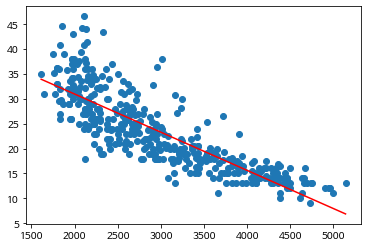

In [23]:
x = np.linspace(df[4].min(), df[4].max(), 100)
Y = w[0]+ w[1]*x
plt.scatter(x=df[4],y=df[0])
plt.plot(x,Y, color='r')

+ 최소제곱법에서는 행렬 계산을 통해 한번에 가중치를 계산해내게 된다.
+ 뉴턴의 방법 또는 경사하강법 등 알고리즘 방식을 통해 가중치를 구할 수도 있고 결과는 같다.

### 최적화방법

+ 머신러닝은 데이터를 이용해 손실함수를 최소화 하는 모형의 모수를 정하게 된다. 이는 곧 최적화 문제이다.
+ 미분이 불가능한 경우 수치해석 방법으로 손실함수를 최소화 한다.
+ 수치해석 최소화 방법으로 뉴턴 방법과 경사하강법이 있다.
   
<br>   
   

**뉴턴의 방법**

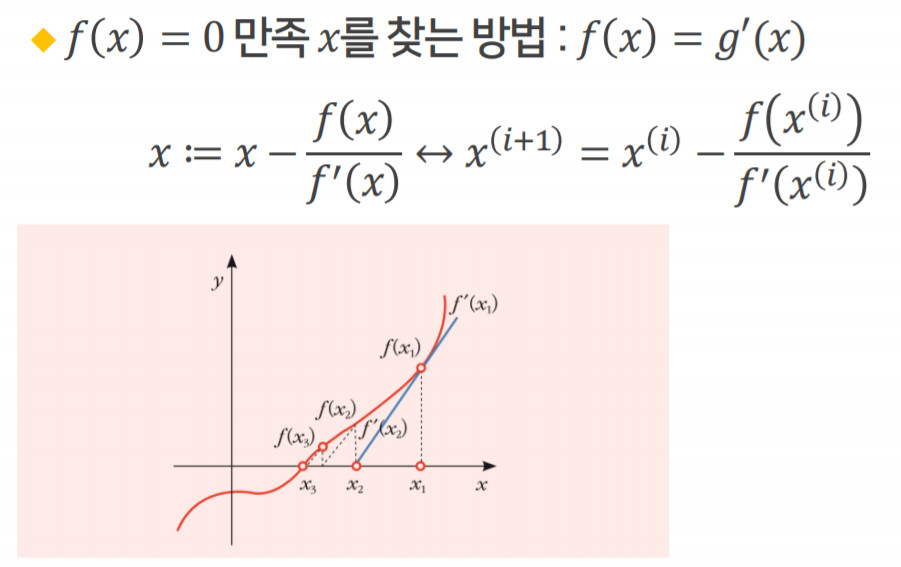

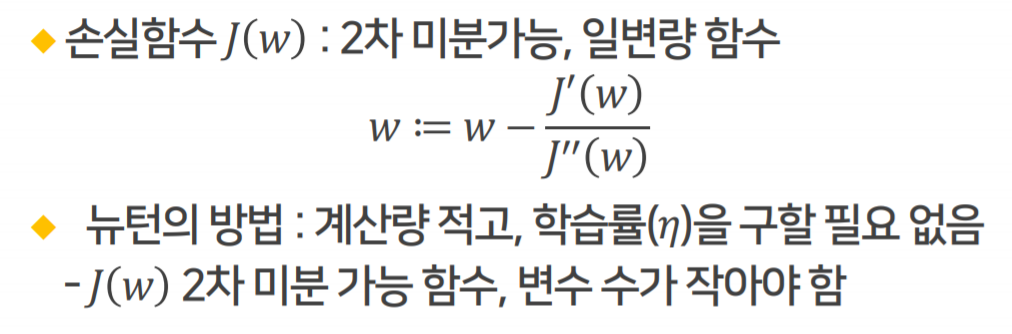

In [24]:
a = Image('./data/0904_07_01.jpg', width=700)
b = Image('./data/0904_07_02.png', width=500)
display(a,b)

**경사하강법**
+ 현재 위치에서 기울기가 낮아지는 방향으로 조금씩 내려가는 방법
  + 1) 0 주변의 임의의 값을 가중치의 초기값으로 한다.
  + 2) 손실함수의 가중치에 대한 기울기 (그래디언트, 미분값)을 구한다.
  + 3) 기울기와 반대 방향으로 가중치를 갱신하는 것을 반복한다.
  + 4) 최적점을 찾는다.
  
+ 문제
  + local minimun의 문제
  + 학습률 문제
  
+ 확률적 경사하강법
  + 전체 데이터가 아닌 임의의 데이터를 추출하여 그 점에서 기울기를 구해 가중치를 갱신
  + 국지적 최소점에 머무를 가능성이 낮아진다.
  + 하강 경로가 복잡해질 수 있다.
+ 미니배치 경사하강법
  + 확률적 경사하강법보다 수렴 경로가 덜 불규칙적이고 학습시간도 짧다.
  
+ 용어
  + 에포크, 배치

<br>

---
<br>

### 로지스틱 회귀와 소프트맥스 회귀

Text(0.5, 1.0, '시그모이드 함수')

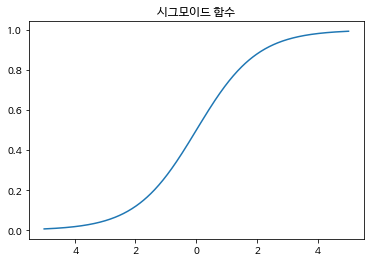

In [25]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) 

X = np.linspace(-5.0, 5.0, 500)
Y = sigmoid(X)
plt.plot(X, Y)
plt.title('시그모이드 함수')

+ 소프트 맥스
$$ g(x_i) = \frac{exp(x_i)}{\sum_j exp(x_j)} $$

|출력변수| 최종 레이어 활성화함수 | 손실함수|
|:-|:-|:-|
|베르누이 분포|시그모이드| binary cross entropy |
|멀티누이 분포|소프트맥스| categorical cross entropy |
|정규분포|선형|평균제곱오차|

### XOR 문제와 다층 신경망
+ 다층 신경망으로는 단층 신경망으로 풀 수 없던 XOR 문제를 풀어낼 수 있다.


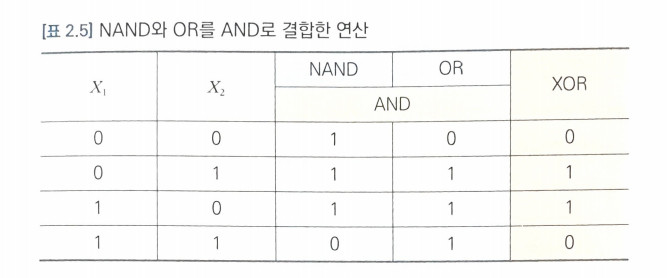

In [26]:
Image('./data/0904_08.jpg')